In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline



ModuleNotFoundError: No module named 'plotly'

In [3]:
ourbank_df = pd.read_csv('Our Bank customer data.csv')

In [4]:
ourbank_df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Unnamed: 21                 float64
dtype: object

In [5]:
ourbank_df.info

<bound method DataFrame.info of        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income

In [6]:
ourbank_df.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,NaN
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,NaN
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,NaN
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,NaN
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,NaN


In [7]:
ourbank_df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Unnamed: 21'],
      dtype='object')

In [8]:
#Convert categorical values columns to numerical values for clustering + visualisation use.
#Need to convert: Income_Category, Attrition_Flag, Gender, Education_Level, Marital_Status, Card_Category

ourbank_df = pd.read_csv('Our Bank customer data.csv')
#Income_Category is releveled with 4=Less than $40K, 1=$40-$60K, 2=$60-$80K, 3=$80-$120K, 0=$120K+ & 5=Unknown
ourbank_df['Income_Category_cat'] = ourbank_df['Income_Category'].astype('category').cat.codes

#Attrition_Flag is releveled with 0=Attrited Customer and 1=Existing Customer 
ourbank_df['Attrition_Flag_cat'] = ourbank_df['Attrition_Flag'].astype('category').cat.codes

#Gender is releveled with 0=Female and 1=Male
ourbank_df['Gender_cat'] = ourbank_df['Gender'].astype('category').cat.codes

#Education_Level releveled w/ 0=College, 1=Doctorate, 2=Graduate, 3=High School, 4=Post-Graduate, 5=Uneducated & 6=Unknown
ourbank_df['Education_Level_cat'] = ourbank_df['Education_Level'].astype('category').cat.codes

#Marital_Status releveled with 0=Divorced, 1=Married, 2=Single & 3=Unknown
ourbank_df['Marital_Status_cat'] = ourbank_df['Marital_Status'].astype('category').cat.codes

#Card_Category tiers releveled with 0=Blue, 3=Silver, 1=Gold, 2=Platinum 
ourbank_df['Card_Category_cat'] = ourbank_df['Card_Category'].astype('category').cat.codes


In [9]:
ourbank_df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Unnamed: 21                 float64
Income_Category_cat            int8
Attrition_Flag_cat             int8
Gender_cat                     int8
Education_Level_cat            int8
Marital_Status_cat             int8
Card_Category_cat           

In [10]:
ourbank_df.shape

(10127, 28)

In [11]:
ourbank_df.size


283556

In [12]:
ourbank_df.to_csv('Our Bank customer data2.csv', header=True, index=False)

In [13]:
ourbank_df = pd.read_csv('Our Bank customer data2.csv')

In [14]:
#Checking for nulls

ourbank_df.isnull().sum()

CLIENTNUM                       0
Attrition_Flag                  0
Customer_Age                    0
Gender                          0
Dependent_count                 0
Education_Level                 0
Marital_Status                  0
Income_Category                 0
Card_Category                   0
Months_on_book                  0
Total_Relationship_Count        0
Months_Inactive_12_mon          0
Contacts_Count_12_mon           0
Credit_Limit                    0
Total_Revolving_Bal             0
Avg_Open_To_Buy                 0
Total_Amt_Chng_Q4_Q1            0
Total_Trans_Amt                 0
Total_Trans_Ct                  0
Total_Ct_Chng_Q4_Q1             0
Avg_Utilization_Ratio           0
Unnamed: 21                 10127
Income_Category_cat             0
Attrition_Flag_cat              0
Gender_cat                      0
Education_Level_cat             0
Marital_Status_cat              0
Card_Category_cat               0
dtype: int64

In [15]:
#Delete random column 'Unnamed:21'.
del ourbank_df['Unnamed: 21']



In [16]:
ourbank_df.groupby('Card_Category_cat', as_index=False).count()

,Card_Category_cat,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income_Category_cat,Attrition_Flag_cat,Gender_cat,Education_Level_cat,Marital_Status_cat
0,0,9436,9436,9436,9436,9436,9436,9436,9436,9436,...,9436,9436,9436,9436,9436,9436,9436,9436,9436,9436
1,1,116,116,116,116,116,116,116,116,116,...,116,116,116,116,116,116,116,116,116,116
2,2,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
3,3,555,555,555,555,555,555,555,555,555,...,555,555,555,555,555,555,555,555,555,555


In [17]:
ourbank_df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Income_Category_cat', 'Attrition_Flag_cat', 'Gender_cat',
       'Education_Level_cat', 'Marital_Status_cat', 'Card_Category_cat'],
      dtype='object')

In [18]:
ourbank_df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Income_Category_cat', 'Attrition_Flag_cat', 'Gender_cat',
       'Education_Level_cat', 'Marital_Status_cat', 'Card_Category_cat'],
      dtype='object')

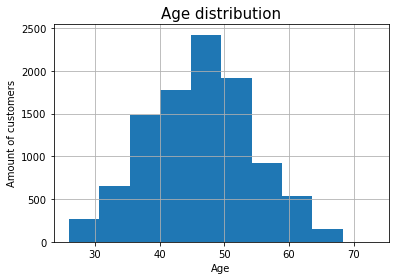

In [19]:
#EDA checks across demographic and behavioural variables to sense relationships between variables.
#Plotting the overall dstribution of the age

ourbank_df["Customer_Age"].hist()
plt.xlabel("Age")
plt.ylabel("Amount of customers")
plt.title("Age distribution", fontsize=15)
plt.show()

#Normally distribution of age.

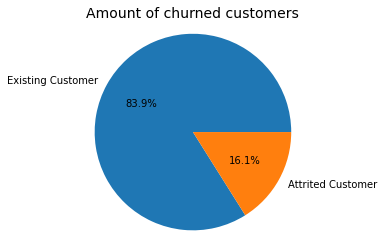

In [20]:
target = ourbank_df["Attrition_Flag"].value_counts()

fig1, ax1 = plt.subplots()

ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
ax1.axis('equal')
plt.title("Amount of churned customers", fontsize=14)
plt.show()

#Majority of customers are existing (83.9%), churned is only 16.1% meaning imbalanced data. 
#Better to look at more sampling for accurate results


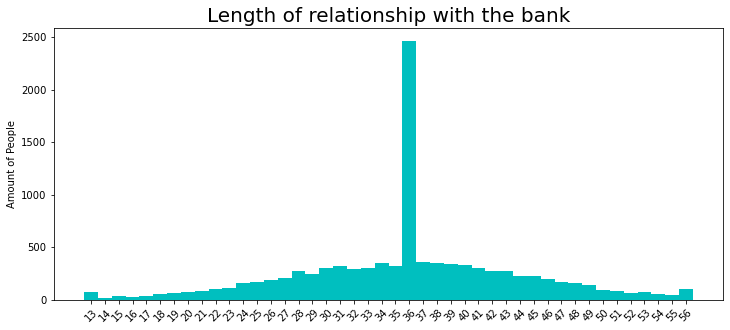

In [21]:
column = "Months_on_book"

N = len(ourbank_df[column].unique())
DataCounts = ourbank_df[column].value_counts().sort_index()

ind = np.arange(N) 
width = 1       

figs, axs = plt.subplots(figsize=(12,5))

axs.bar(ind, DataCounts, width, color='c')
axs.set_ylabel('Amount of People')
axs.set_title('Length of relationship with the bank', fontsize=20)
axs.set_xticks(ind)
axs.set_xticklabels(DataCounts.index.tolist(), rotation=45)

plt.show()

In [22]:
ourbank_df['Customer_Age_Categorised'] = pd.cut(ourbank_df['Customer_Age'], bins=5)
ourbank_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income_Category_cat,Attrition_Flag_cat,Gender_cat,Education_Level_cat,Marital_Status_cat,Card_Category_cat,Customer_Age_Categorised
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,42,1.625,0.061,2,1,1,3,1,0,"(44.8, 54.2]"
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,33,3.714,0.105,4,1,0,2,2,0,"(44.8, 54.2]"
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,20,2.333,0.000,3,1,1,2,1,0,"(44.8, 54.2]"
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,20,2.333,0.760,4,1,0,3,3,0,"(35.4, 44.8]"
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,28,2.500,0.000,2,1,1,5,1,0,"(35.4, 44.8]"


In [23]:
#To explore 4) Customer_age vs. months_on_book (0.78)

ourbank_df.groupby('Customer_Age_Categorised')['Months_on_book'].agg(['mean','count'])

#Appears as age increases, the length of time on book increases. 

,mean,count
Customer_Age_Categorised,,
"(25.953, 35.4]",24.723613,919
"(35.4, 44.8]",31.343366,3256
"(44.8, 54.2]",38.184247,4342
"(54.2, 63.6]",44.952610,1456
"(63.6, 73.0]",50.811688,154


In [24]:
ourbank_df.group('Card_Category').value_counts()

AttributeError: 'DataFrame' object has no attribute 'group'

In [25]:
ourbank_df.groupby('Card_Category')['Customer_Age_Categorised'].value_counts()



Card_Category  Customer_Age_Categorised
Blue           (44.8, 54.2]                4028
               (35.4, 44.8]                3015
               (54.2, 63.6]                1385
               (25.953, 35.4]               858
               (63.6, 73.0]                 150
Gold           (44.8, 54.2]                  56
               (35.4, 44.8]                  41
               (25.953, 35.4]                10
               (54.2, 63.6]                   9
Platinum       (44.8, 54.2]                  13
               (35.4, 44.8]                   6
               (54.2, 63.6]                   1
Silver         (44.8, 54.2]                 245
               (35.4, 44.8]                 194
               (54.2, 63.6]                  61
               (25.953, 35.4]                51
               (63.6, 73.0]                   4
Name: Customer_Age_Categorised, dtype: int64

In [26]:
#GENDER EDA

ourbank_df['Gender'].value_counts()



F    5358
M    4769
Name: Gender, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

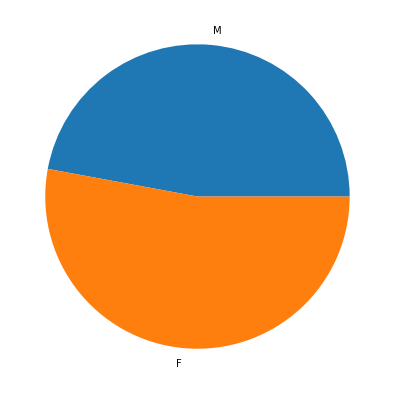

In [27]:
labels = ourbank_df['Gender'].unique()
sizes = [ourbank_df['Gender'].value_counts()[1],ourbank_df['Gender'].value_counts()[0]]
plt.figure(figsize = (7,7))
plt.pie(sizes,labels=labels)
plt.show


In [28]:
#EDA with gender on credit_limit vs. gender -- insights, trends and patterns uncovered.

ourbank_df.groupby('Gender_cat')['Credit_Limit'].agg(['mean','count'])

#More females than men (53% vs. 47%) are using credit cards with OurBank, 
#Average credit card limit for men is $12.6K, women is $5K
#Correlation value of 0.42 suggests a moderate relationship between gender and credit_limit

,mean,count
Gender_cat,,
0,5023.854274,5358
1,12685.674963,4769


In [29]:
ourbank_df.groupby('Gender')['Avg_Open_To_Buy'].agg(['mean','count'])
#Correlation value of 0.41 suggests a moderate relationship between gender and avg_open_to_buy



,mean,count
Gender,,
F,3883.843076,5358
M,11497.241749,4769


In [30]:
ourbank_df.groupby('Gender')['Total_Trans_Amt','Total_Trans_Ct'].agg(['mean','count'])


<ipython-input-30-88196b4c065a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ourbank_df.groupby('Gender')['Total_Trans_Amt','Total_Trans_Ct'].agg(['mean','count'])


Total_Trans_Amt       Total_Trans_Ct      
                  mean count           mean count
Gender                                           
F          4324.318216  5358      66.352370  5358
M          4493.706228  4769      63.180541  4769

In [31]:
#Income_Category_cat vs. Card_Category_cat

ourbank_df.groupby('Income_Category')['Card_Category'].value_counts()




Income_Category  Card_Category
$120K +          Blue              645
                 Silver             60
                 Gold               18
                 Platinum            4
$40K - $60K      Blue             1675
                 Silver             99
                 Gold               15
                 Platinum            1
$60K - $80K      Blue             1273
                 Silver             96
                 Gold               29
                 Platinum            4
$80K - $120K     Blue             1395
                 Silver            117
                 Gold               21
                 Platinum            2
Less than $40K   Blue             3403
                 Silver            130
                 Gold               24
                 Platinum            4
Unknown          Blue             1045
                 Silver             53
                 Gold                9
                 Platinum            5
Name: Card_Category, dtype: int64

In [32]:
#Income_Category_cat vs. Card_Category_cat

ourbank_df.groupby('Income_Category')['Card_Category'].value_counts()

Income_Category  Card_Category
$120K +          Blue              645
                 Silver             60
                 Gold               18
                 Platinum            4
$40K - $60K      Blue             1675
                 Silver             99
                 Gold               15
                 Platinum            1
$60K - $80K      Blue             1273
                 Silver             96
                 Gold               29
                 Platinum            4
$80K - $120K     Blue             1395
                 Silver            117
                 Gold               21
                 Platinum            2
Less than $40K   Blue             3403
                 Silver            130
                 Gold               24
                 Platinum            4
Unknown          Blue             1045
                 Silver             53
                 Gold                9
                 Platinum            5
Name: Card_Category, dtype: int64

In [33]:
#Attrition_Flag EDA

ourbank_df['Attrition_Flag'].value_counts()

#With 10127 observations, 16.1% are customers that have attrition attributed. 83.9% are existing customers.
#Therefore, this poses a challenge as an imbalanced dataset if used for potential modelling purposes.

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

<BarContainer object of 2 artists>

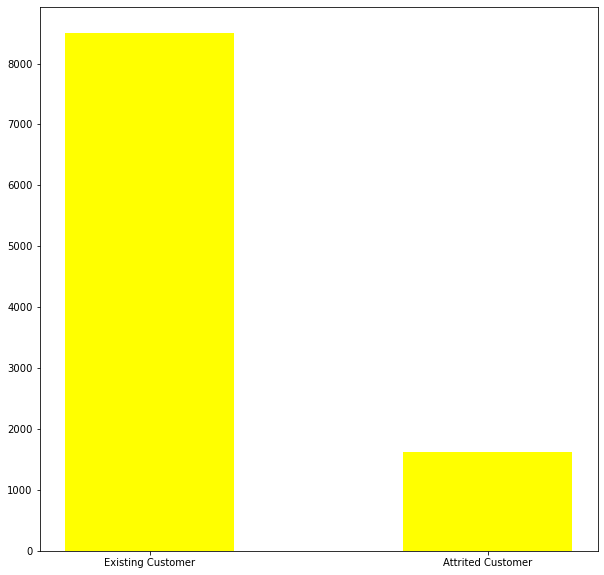

In [34]:
#Visualising Attrition_Flag

customer_type = ourbank_df['Attrition_Flag'].value_counts().keys()
customer_type_values = [ourbank_df['Attrition_Flag'].value_counts()[0],ourbank_df['Attrition_Flag'].value_counts()[1]]
plt.figure(figsize=(10,10))
plt.bar(customer_type, customer_type_values, color = 'yellow', width = .5)

In [35]:
churn = ourbank_df[ourbank_df["Attrition_Flag"] == 'Attrited Customer']
non_churn = ourbank_df[ourbank_df["Attrition_Flag"] == 'Existing Customer']

In [36]:
#EDA on Attrited Customers
churn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income_Category_cat,Attrition_Flag_cat,Gender_cat,Education_Level_cat,Marital_Status_cat,Card_Category_cat,Customer_Age_Categorised
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,16,0.600,0.000,4,0,0,2,1,0,"(54.2, 63.6]"
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,16,0.143,0.077,5,0,0,1,1,0,"(63.6, 73.0]"
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,...,19,0.900,0.562,4,0,0,2,1,0,"(44.8, 54.2]"
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,...,15,0.364,0.000,0,0,1,2,1,0,"(54.2, 63.6]"
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,15,0.500,0.000,2,0,1,2,1,3,"(44.8, 54.2]"


In [37]:
churn.count()

#1627 churned.

CLIENTNUM                   1627
Attrition_Flag              1627
Customer_Age                1627
Gender                      1627
Dependent_count             1627
Education_Level             1627
Marital_Status              1627
Income_Category             1627
Card_Category               1627
Months_on_book              1627
Total_Relationship_Count    1627
Months_Inactive_12_mon      1627
Contacts_Count_12_mon       1627
Credit_Limit                1627
Total_Revolving_Bal         1627
Avg_Open_To_Buy             1627
Total_Amt_Chng_Q4_Q1        1627
Total_Trans_Amt             1627
Total_Trans_Ct              1627
Total_Ct_Chng_Q4_Q1         1627
Avg_Utilization_Ratio       1627
Income_Category_cat         1627
Attrition_Flag_cat          1627
Gender_cat                  1627
Education_Level_cat         1627
Marital_Status_cat          1627
Card_Category_cat           1627
Customer_Age_Categorised    1627
dtype: int64

In [38]:
#Breakdown of churned customers by gender, attrition count and averages of variables.
churn.groupby("Gender").agg({"Credit_Limit":"mean", "Dependent_count":"mean", "Months_on_book":"mean", "Customer_Age":"mean", "Attrition_Flag":"count", "Total_Trans_Amt":"mean", "Contacts_Count_12_mon":"mean", "Total_Revolving_Bal":"mean", "Total_Trans_Ct":"mean", "Avg_Open_To_Buy":"mean", "Avg_Utilization_Ratio":"mean", "Total_Relationship_Count":"mean", "Total_Amt_Chng_Q4_Q1":"mean", "Total_Ct_Chng_Q4_Q1":"mean", "Months_Inactive_12_mon":"mean"})

#Interesting that their total_relationship_count was around 3, compared to customers, avg. 4.

,Credit_Limit,Dependent_count,Months_on_book,Customer_Age,Attrition_Flag,Total_Trans_Amt,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Ct,Avg_Open_To_Buy,Avg_Utilization_Ratio,Total_Relationship_Count,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Months_Inactive_12_mon
Gender,,,,,,,,,,,,,,,
F,4515.497527,2.373118,36.151613,46.623656,930,2784.183871,2.935484,667.207527,44.051613,3848.29000,0.204697,3.398925,0.683842,0.535881,2.689247
M,12966.891679,2.441894,36.213773,46.707317,697,3509.779053,3.021521,680.315638,46.110473,12286.57604,0.106139,3.120516,0.708199,0.579077,2.698709


In [39]:
#Breakdown of existing customers by gender, existing customer count and averages of variables.
non_churn.groupby("Gender").agg({"Credit_Limit":"mean",  "Dependent_count":"mean",  "Months_on_book":"mean", "Customer_Age":"mean", "Attrition_Flag":"count", "Total_Trans_Amt":"mean", "Contacts_Count_12_mon":"mean", "Total_Revolving_Bal":"mean","Total_Trans_Ct":"mean", "Avg_Open_To_Buy":"mean", "Avg_Utilization_Ratio":"mean", "Total_Relationship_Count":"mean","Total_Amt_Chng_Q4_Q1":"mean", "Total_Ct_Chng_Q4_Q1":"mean", "Months_Inactive_12_mon":"mean"})




,Credit_Limit,Dependent_count,Months_on_book,Customer_Age,Attrition_Flag,Total_Trans_Amt,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Ct,Avg_Open_To_Buy,Avg_Utilization_Ratio,Total_Relationship_Count,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Months_Inactive_12_mon
Gender,,,,,,,,,,,,,,,
F,5130.622967,2.333785,35.942864,46.421861,4428,4647.788166,2.303975,1239.312782,71.036134,3891.310185,0.370785,3.893857,0.769239,0.750835,2.280939
M,12637.539391,2.337181,35.812868,46.088409,4072,4662.124018,2.413310,1275.407171,66.102407,11362.132220,0.215537,3.937132,0.776066,0.733298,2.265963


In [40]:
#Group by churned, card category breakdown and average limit.

ourbank_df.groupby(["Attrition_Flag", "Gender", "Card_Category"]).agg({"Credit_Limit":"mean", "Card_Category":"count", "Contacts_Count_12_mon":"mean"})

#

Credit_Limit  Card_Category  \
Attrition_Flag    Gender Card_Category                                
Attrited Customer F      Blue            3835.836742            890   
                         Gold           22342.625000              8   
                         Platinum       25251.500000              4   
                         Silver         18063.250000             28   
                  M      Blue           11036.984897            629   
                         Gold           34516.000000             13   
                         Platinum       23981.000000              1   
                         Silver         30055.018519             54   
Existing Customer F      Blue            4407.870933           4211   
                         Gold           20600.166667             30   
                         Platinum       27104.400000              5   
                         Silver         18699.598901            182   
                  M      Blue           10946.283162           3706   
                         Gold           31551.461538             65   
                         Platinum       34516.000000             10   
                         Silver         29199.759450            291   

                                        Contacts_Count_12_mon  
Attrition_Flag    Gender Card_Category                         
Attrited Customer F      Blue                        2.935955  
                         Gold                        2.625000  
                         Platinum                    3.000000  
                         Silver                      3.000000  
                  M      Blue                        3.012719  
                         Gold                        3.230769  
                         Platinum                    4.000000  
                         Silver                      3.055556  
Existing Customer F      Blue                        2.304678  
                         Gold                        2.366667  
                         Platinum                    2.400000  
                         Silver                      2.274725  
                  M      Blue                        2.417161  
                         Gold                        2.307692  
                         Platinum                    2.200000  
                         Silver                      2.395189

In [41]:
ourbank_df.groupby(["Gender","Customer_Age_Categorised"])["Attrition_Flag"].value_counts()

Gender  Customer_Age_Categorised  Attrition_Flag   
F       (25.953, 35.4]            Existing Customer     405
                                  Attrited Customer      66
        (35.4, 44.8]              Existing Customer    1398
                                  Attrited Customer     307
        (44.8, 54.2]              Existing Customer    1904
                                  Attrited Customer     416
        (54.2, 63.6]              Existing Customer     647
                                  Attrited Customer     132
        (63.6, 73.0]              Existing Customer      74
                                  Attrited Customer       9
M       (25.953, 35.4]            Existing Customer     392
                                  Attrited Customer      56
        (35.4, 44.8]              Existing Customer    1331
                                  Attrited Customer     220
        (44.8, 54.2]              Existing Customer    1722
                                  Attrited Custo

In [42]:

#To explore 8) Income_Category_cat vs Avg_Utilization_Ratio (0.12)

ourbank_df.groupby(["Income_Category"]).agg({"Avg_Utilization_Ratio":"mean"})


#Makes sense as the higher the income category bracket you fall into, the lower the avg_utilisation_ratio.

,Avg_Utilization_Ratio
Income_Category,
$120K +,0.125307
$40K - $60K,0.316561
$60K - $80K,0.206075
$80K - $120K,0.161664
Less than $40K,0.377280
Unknown,0.220810


###### To explore 5) Credit_limit vs. avg_open_to_buy (0.995)

ourbank_df.groupby(["Card_Category", "Gender", "Income_Category"]).agg({"Credit_Limit":"mean", "Avg_Open_To_Buy":"mean", "Total_Trans_Ct":"mean", "Contacts_Count_12_mon":"mean"})


In [43]:
#CORRELATION MATRIX
#In labelling strength of the correlation association, 0-0.19=very weak, 0.2-0.39=weak, 0.4-0.59=moderate,
#0.6-0.79=strong, 0.8-1=very strong. arbitary limits, however context of results should also be considered:

#Patterns, trends and insights to explore: 1) Gender vs. credit_limit (0.42) & Gender vs. avg_open_to_buy (0.41)
#To explore 2) Card_category vs. credit_limit (0.48) & Card_category vs. avg_open_to_buy (0.48)
#To explore 3) Avg_utilisation_ratio vs. Total_revolving_balance (0.62)
#To explore 4) Customer_age vs. months_on_book (0.78)
#To explore 5) Credit_limit vs. avg_open_to_buy (0.995)
#To explore 6) Total_Trans_Amt vs. Total_Trans_Ct (0.80)

#Not strong/ Weak correlation associations --
#To explore 7) Attrition_Flag_cat against Total_Trans_Ct (0.37), Total_Ct_Chng_Q4_Q1 (0.29), Avg_Utilisation_ratio (0.18)
#Total_Trans_Amt (0.17), Total_Relationship_Count (0.15), Total_Revolving_Bal (0.26), Total_Amt_Chng_Q4_Q1 (0.13)
#To explore 8) Income_Category_cat vs Avg_Utilization_Ratio (0.12)

ourbank_df.corr()

df = pd.DataFrame(rs.rand(10, 10))
corr = ourbank_df.corr()
corr.style.background_gradient(cmap='coolwarm')

NameError: name 'rs' is not defined

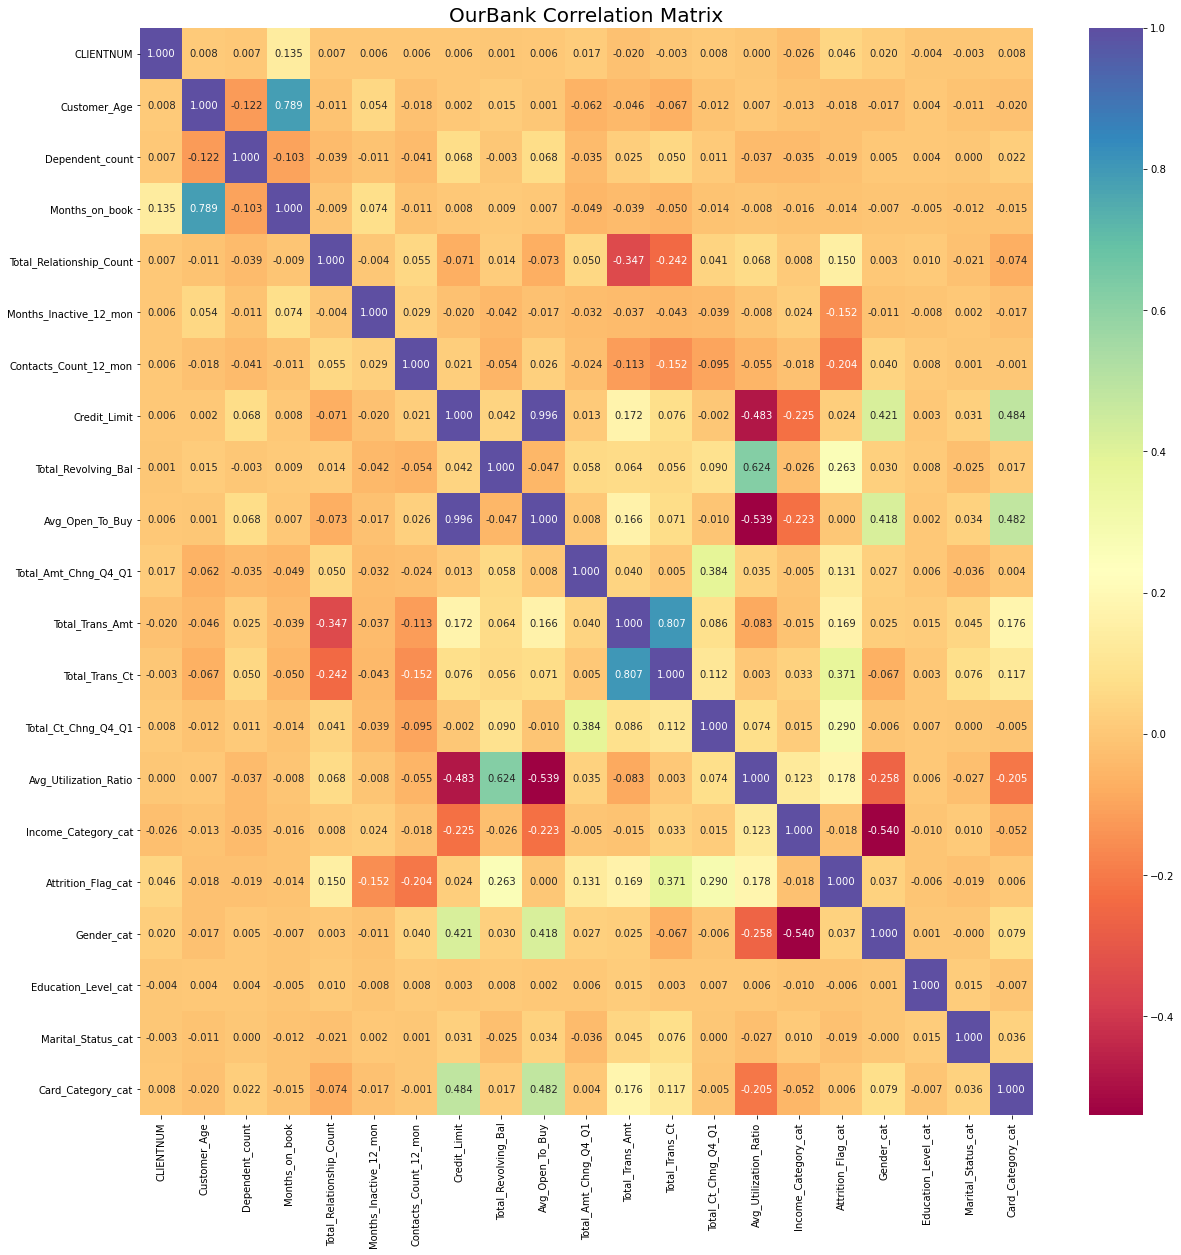

In [44]:
f, ax = plt.subplots(figsize= [20,20])
sns.heatmap(ourbank_df.corr(), annot=True, fmt=".3f", ax=ax, cmap = "Spectral" )
ax.set_title("OurBank Correlation Matrix", fontsize=20)
plt.show()